In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt

## Split Charted File

In [4]:
# Split file into four pieces, since it is really slow
#
df = pd.read_csv("/deep/group/physiologic-states/v3/coverage_2022_02_17.charted.csv")
print(df.shape)
df.head(2)

(462580, 18)


,Unnamed: 0,CSN,Variable,Time,Triage,Chart_filled,Charted,Monitor,Low_bound,High_bound,CSN_char,Coverage,Arrival_time,Roomed_time,Minutes_since_arrival,Arrival_to_roomed,Covered,Coverage_without
0,0,131291536204,HR,2020-08-24T00:36:00Z,1,86.0,86.0,NaN,81.0,91.0,131291536204,0.15748,2020-08-24T00:36:00Z,2020-08-24T01:03:00Z,0,27,NaN,NaN
1,63,131291536204,HR,2020-08-24T02:10:00Z,0,86.0,86.0,67.474576,81.0,91.0,131291536204,0.15748,2020-08-24T00:36:00Z,2020-08-24T01:03:00Z,94,27,0.0,0.158103


In [7]:
csns = list(set(df["CSN"].tolist()))
print(len(csns))

25956


In [8]:
csns_1 = set(csns[:6000])
csns_2 = set(csns[6000:12000])
csns_3 = set(csns[12000:18000])
csns_4 = set(csns[18000:])

print(len(csns_1))
print(len(csns_2))
print(len(csns_3))
print(len(csns_4))

6000
6000
6000
7956


In [9]:
df_1 = df[df["CSN"].isin(csns_1)]
print(df_1.shape)
df_2 = df[df["CSN"].isin(csns_2)]
print(df_2.shape)
df_3 = df[df["CSN"].isin(csns_3)]
print(df_3.shape)
df_4 = df[df["CSN"].isin(csns_4)]
print(df_4.shape)

(106658, 18)
(106499, 18)
(107731, 18)
(141692, 18)


In [10]:
df_1.to_csv("/deep/group/physiologic-states/v3/coverage_2022_02_17.charted.1.csv", index=False)
df_2.to_csv("/deep/group/physiologic-states/v3/coverage_2022_02_17.charted.2.csv", index=False)
df_3.to_csv("/deep/group/physiologic-states/v3/coverage_2022_02_17.charted.3.csv", index=False)
df_4.to_csv("/deep/group/physiologic-states/v3/coverage_2022_02_17.charted.4.csv", index=False)

### Merge the files back together

In [4]:
df_1 = pd.read_csv("/deep/group/physiologic-states/v3/optimizing_coverage.optimal.1.csv")
print(df_1.shape)
df_2 = pd.read_csv("/deep/group/physiologic-states/v3/optimizing_coverage.optimal.2.csv")
print(df_2.shape)
df_3 = pd.read_csv("/deep/group/physiologic-states/v3/optimizing_coverage.optimal.3.csv")
print(df_3.shape)
df_4 = pd.read_csv("/deep/group/physiologic-states/v3/optimizing_coverage.optimal.4.csv")
print(df_4.shape)

(5994, 18)
(5991, 18)
(5994, 18)
(7951, 18)


In [5]:
df = pd.concat([df_1, df_2, df_3, df_4])
print(df.shape)

(25930, 18)


In [6]:
df.head(2)

,CSN,orig_len,orig_covered,orig_total,orig_coverage,best_len,best_covered,best_total,best_coverage,HR_covered,HR_total,RR_covered,RR_total,SpO2_covered,SpO2_total,MAP_covered,MAP_total,runtime
0,131316325120,2,502,778,0.645244,2,1091,1260,0.865873,151,220,154,220,294,297,28,41,121.742869
1,131298896241,5,335,517,0.647969,2,134,134,1.000000,0,131,0,131,134,134,0,121,18.168598


In [7]:
df.to_csv("/deep/group/physiologic-states/v3/optimizing_coverage.optimal.csv")

In [14]:
with open("/deep/group/physiologic-states/v3/optimizing_coverage.optimal.1.pkl", 'rb') as f: 
    b_1 = pickle.loads(f.read())
with open("/deep/group/physiologic-states/v3/optimizing_coverage.optimal.2.pkl", 'rb') as f: 
    b_2 = pickle.loads(f.read())
with open("/deep/group/physiologic-states/v3/optimizing_coverage.optimal.3.pkl", 'rb') as f: 
    b_3 = pickle.loads(f.read())
with open("/deep/group/physiologic-states/v3/optimizing_coverage.optimal.4.pkl", 'rb') as f: 
    b_4 = pickle.loads(f.read())

output_times = []
output_times.extend(b_1["output_times"])
output_times.extend(b_2["output_times"])
output_times.extend(b_3["output_times"])
output_times.extend(b_4["output_times"])

print(len(output_times))

25930


In [15]:
a = {
    "output_times": output_times
}

with open('/deep/group/physiologic-states/v3/optimizing_coverage.optimal.pkl', 'wb') as handle:
    pickle.dump(a, handle, protocol=pickle.HIGHEST_PROTOCOL)


## Optimal (All)

In [8]:
df = pd.read_csv("/deep/group/physiologic-states/v3/optimizing_coverage.optimal.csv")
print(df.shape)
df.head(3)

(25930, 19)


,Unnamed: 0,CSN,orig_len,orig_covered,orig_total,orig_coverage,best_len,best_covered,best_total,best_coverage,HR_covered,HR_total,RR_covered,RR_total,SpO2_covered,SpO2_total,MAP_covered,MAP_total,runtime
0,0,131316325120,2,502,778,0.645244,2,1091,1260,0.865873,151,220,154,220,294,297,28,41,121.742869
1,1,131298896241,5,335,517,0.647969,2,134,134,1.000000,0,131,0,131,134,134,0,121,18.168598
2,2,131316322281,2,250,539,0.463822,2,355,437,0.812357,143,154,86,154,126,141,0,90,21.507338


In [9]:
df["orig_coverage"].describe()

count    25930.000000
mean         0.609277
std          0.149347
min          0.000000
25%          0.514432
50%          0.615764
75%          0.713847
max          1.000000
Name: orig_coverage, dtype: float64

In [10]:
df["best_coverage"].describe()

count    25930.000000
mean         0.909663
std          0.076401
min          0.088710
25%          0.866667
50%          0.923455
75%          0.971292
max          1.000000
Name: best_coverage, dtype: float64

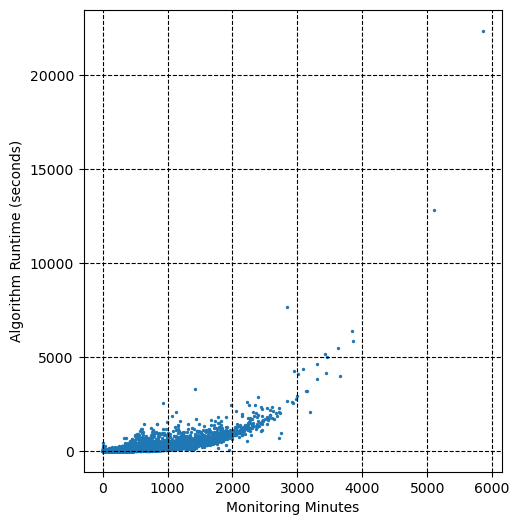

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(5.4, 6))
# ax.set_aspect('equal')
ax.grid(b=True, which='major', color='k', linestyle='--')
plt.scatter(df["best_total"], df["runtime"], s=2)
plt.xlabel("Monitoring Minutes")
plt.ylabel("Algorithm Runtime (seconds)")
plt.show()

## Optimal (HR)

In [16]:
df = pd.read_csv("/deep/group/physiologic-states/v3/optimizing_coverage.optimal.hr.csv")
print(df.shape)
df.head(10)

(25940, 12)


,CSN,orig_len,orig_covered,orig_total,orig_coverage,best_len,best_covered,best_total,best_coverage,HR_covered,HR_total,runtime
0,131307113250,3,179,310,0.577419,3,254,309,0.822006,254,310,119.385040
1,131305881124,2,35,53,0.660377,2,45,53,0.849057,45,53,1.414991
2,131308218446,4,124,147,0.843537,4,147,147,1.000000,147,147,15.513437
3,131307113248,2,52,52,1.000000,2,51,51,1.000000,42,52,1.566337
4,131305877890,4,85,125,0.680000,4,116,125,0.928000,116,125,10.058993
5,131308217743,2,7,8,0.875000,1,8,8,1.000000,8,8,0.242667
6,131307113198,3,14,97,0.144330,3,80,96,0.833333,66,97,5.692715
7,131305877849,16,256,352,0.727273,16,345,352,0.980114,345,352,197.605456
8,131308217617,4,43,118,0.364407,4,112,118,0.949153,112,118,9.181688
9,131307113081,3,13,90,0.144444,3,87,89,0.977528,87,90,4.559372


In [17]:
df["orig_coverage"].describe()

count    25940.000000
mean         0.516290
std          0.281298
min          0.000000
25%          0.293817
50%          0.517588
75%          0.745507
max          1.000000
Name: orig_coverage, dtype: float64

In [18]:
df["best_coverage"].describe()

count    25940.000000
mean         0.918630
std          0.100743
min          0.300000
25%          0.878049
50%          0.956204
75%          1.000000
max          1.000000
Name: best_coverage, dtype: float64

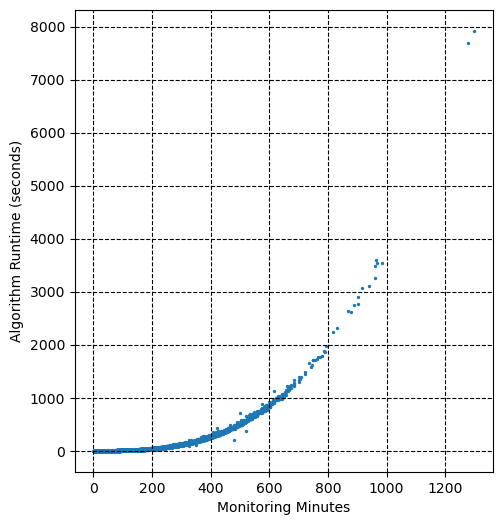

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(5.4, 6))
# ax.set_aspect('equal')
ax.grid(b=True, which='major', color='k', linestyle='--')
plt.scatter(df["best_total"], df["runtime"], s=2)
plt.xlabel("Monitoring Minutes")
plt.ylabel("Algorithm Runtime (seconds)")
plt.show()

## Optimal (RR)

In [19]:
df = pd.read_csv("/deep/group/physiologic-states/v3/optimizing_coverage.optimal.rr.csv")
print(df.shape)
df.head(2)

(25864, 12)


,CSN,orig_len,orig_covered,orig_total,orig_coverage,best_len,best_covered,best_total,best_coverage,RR_covered,RR_total,runtime
0,131293745562,3,54,197,0.274112,3,122,197,0.619289,122,197,29.410137
1,131295260109,6,64,160,0.400000,6,154,160,0.962500,154,160,17.611413


In [20]:
df["orig_coverage"].describe()

count    25864.000000
mean         0.531137
std          0.227655
min          0.000000
25%          0.368767
50%          0.545455
75%          0.707317
max          1.000000
Name: orig_coverage, dtype: float64

In [21]:
df["best_coverage"].describe()

count    25864.000000
mean         0.864361
std          0.098686
min          0.112676
25%          0.807692
50%          0.881481
75%          0.938776
max          1.000000
Name: best_coverage, dtype: float64

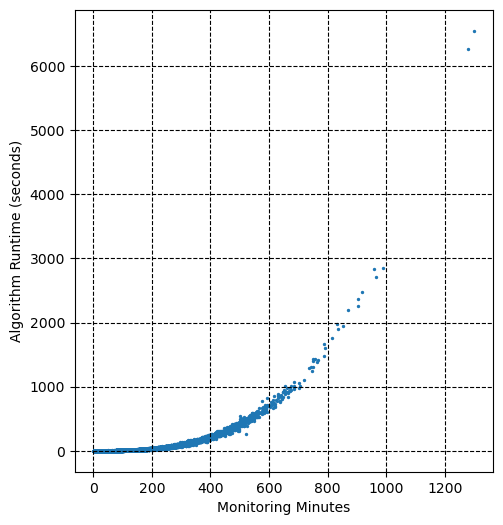

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(5.4, 6))
# ax.set_aspect('equal')
ax.grid(b=True, which='major', color='k', linestyle='--')
plt.scatter(df["best_total"], df["runtime"], s=2)
plt.xlabel("Monitoring Minutes")
plt.ylabel("Algorithm Runtime (seconds)")
plt.show()

## Optimal (SpO2)

In [22]:
df = pd.read_csv("/deep/group/physiologic-states/v3/optimizing_coverage.optimal.spo2.csv")
print(df.shape)
df.head(2)

(25921, 12)


,CSN,orig_len,orig_covered,orig_total,orig_coverage,best_len,best_covered,best_total,best_coverage,SpO2_covered,SpO2_total,runtime
0,131300927769,3,216,228,0.947368,3,224,228,0.982456,224,228,38.987413
1,131318008939,3,89,89,1.000000,3,89,89,1.000000,89,89,3.539781


In [23]:
df["orig_coverage"].describe()

count    25921.000000
mean         0.780795
std          0.237775
min          0.000000
25%          0.654135
50%          0.866667
75%          0.975709
max          1.000000
Name: orig_coverage, dtype: float64

In [24]:
df["best_coverage"].describe()

count    25921.000000
mean         0.975467
std          0.056090
min          0.007246
25%          0.978261
50%          1.000000
75%          1.000000
max          1.000000
Name: best_coverage, dtype: float64

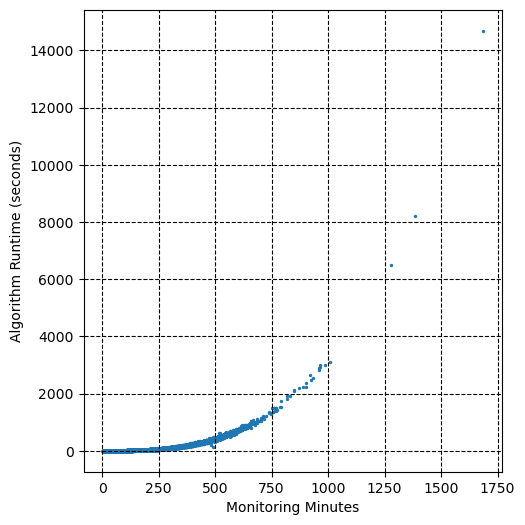

In [32]:
fig, ax = plt.subplots(1, 1, figsize=(5.4, 6))
# ax.set_aspect('equal')
ax.grid(b=True, which='major', color='k', linestyle='--')
plt.scatter(df["best_total"], df["runtime"], s=2)
plt.xlabel("Monitoring Minutes")
plt.ylabel("Algorithm Runtime (seconds)")
plt.show()

## Optimal (MAP)

In [25]:
df = pd.read_csv("/deep/group/physiologic-states/v3/optimizing_coverage.optimal.map.csv")
print(df.shape)
df.head(10)

(24532, 12)


,CSN,orig_len,orig_covered,orig_total,orig_coverage,best_len,best_covered,best_total,best_coverage,MAP_covered,MAP_total,runtime
0,131309115537,2,76,76,1.000000,1,76,76,1.000000,76,76,2.295320
1,131311166697,3,9,9,1.000000,1,9,9,1.000000,9,9,0.196519
2,131309113876,2,21,50,0.420000,2,35,50,0.700000,35,50,1.027970
3,131311165589,3,1,27,0.037037,1,26,27,0.962963,26,27,0.267938
4,131309111939,4,33,61,0.540984,2,61,61,1.000000,61,61,1.481304
5,131311165108,6,131,163,0.803681,5,163,163,1.000000,163,163,16.087948
6,131309111274,2,289,350,0.825714,2,350,350,1.000000,350,350,89.848144
7,131311164825,6,120,121,0.991736,1,120,121,0.991736,120,121,5.949802
8,131309108000,3,40,71,0.563380,3,70,71,0.985915,70,71,2.133740
9,131309107473,3,28,104,0.269231,3,102,103,0.990291,73,104,5.661743


In [26]:
df["orig_coverage"].describe()

count    24532.000000
mean         0.570294
std          0.300577
min          0.000000
25%          0.337314
50%          0.589286
75%          0.829949
max          1.000000
Name: orig_coverage, dtype: float64

In [27]:
df["best_coverage"].describe()

count    24532.000000
mean         0.963639
std          0.077743
min          0.041451
25%          0.975000
50%          1.000000
75%          1.000000
max          1.000000
Name: best_coverage, dtype: float64

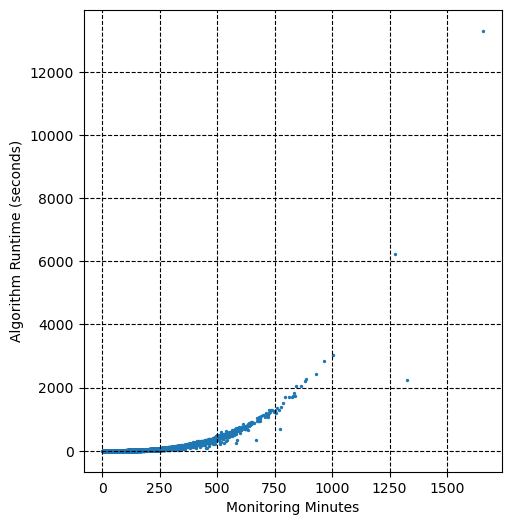

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(5.4, 6))
# ax.set_aspect('equal')
ax.grid(b=True, which='major', color='k', linestyle='--')
plt.scatter(df["best_total"], df["runtime"], s=2)
plt.xlabel("Monitoring Minutes")
plt.ylabel("Algorithm Runtime (seconds)")
plt.show()

## Population (All)

In [35]:
df = pd.read_csv("/deep/group/physiologic-states/v3/optimizing_coverage_population.optimal.csv", index_col=False)
print(df.shape)
df.head(10)

(25830, 18)


,CSN,orig_len,orig_covered,orig_total,orig_coverage,best_len,best_covered,best_total,best_coverage,HR_covered,HR_total,RR_covered,RR_total,SpO2_covered,SpO2_total,MAP_covered,MAP_total,runtime
0,131305340187,6,718,1190,0.603361,6,1049,1190,0.881513,281,298,265,293,276,304,227,295,63.234995
1,131295823551,4,683,1130,0.604425,4,922,1130,0.815929,199,217,142,217,260,351,321,345,69.240899
2,131318324804,3,321,371,0.865229,3,353,371,0.951482,98,102,89,102,102,102,64,65,22.002185
3,131305338991,9,427,792,0.539141,9,580,792,0.732323,146,188,109,187,170,213,155,204,46.709998
4,131295822994,2,265,421,0.629454,2,360,421,0.855107,106,131,23,44,140,155,91,91,18.159319
5,131318323444,7,844,1515,0.557096,7,1208,1515,0.797360,326,389,226,389,333,390,323,347,86.022138
6,131305336841,7,254,560,0.453571,7,477,560,0.851786,134,142,123,142,102,144,118,132,35.483906
7,131295822775,2,46,144,0.319444,2,124,144,0.861111,38,38,23,38,35,39,28,29,7.316278
8,131318322675,2,182,326,0.558282,2,251,326,0.769939,65,87,57,85,74,85,55,69,17.990520
9,131305332897,2,110,316,0.348101,2,248,316,0.784810,72,88,59,88,83,87,34,53,15.214239


In [36]:
df["orig_coverage"].describe()

count    25830.000000
mean         0.609099
std          0.149208
min          0.000000
25%          0.514371
50%          0.615674
75%          0.713707
max          1.000000
Name: orig_coverage, dtype: float64

In [7]:
df["best_coverage"].describe()

count    25830.000000
mean         0.838768
std          0.082587
min          0.216802
25%          0.790128
50%          0.847848
75%          0.898210
max          1.000000
Name: best_coverage, dtype: float64

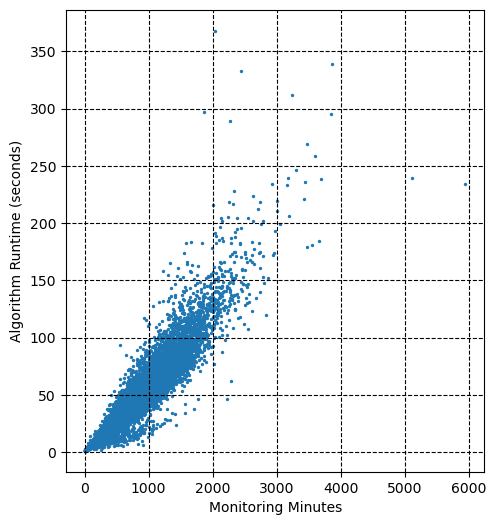

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(5.4, 6))
# ax.set_aspect('equal')
ax.grid(b=True, which='major', color='k', linestyle='--')
plt.scatter(df["best_total"], df["runtime"], s=2)
plt.xlabel("Monitoring Minutes")
plt.ylabel("Algorithm Runtime (seconds)")
plt.show()

## Population (HR)

In [2]:
df = pd.read_csv("/deep/group/physiologic-states/v3/optimizing_coverage_population.optimal.hr.csv")
print(df.shape)
df.head(10)

(25791, 12)


,CSN,orig_len,orig_covered,orig_total,orig_coverage,best_len,best_covered,best_total,best_coverage,HR_covered,HR_total,runtime
0,131313966405,3,61,86,0.709302,3,68,86,0.790698,68,86,6.365554
1,131296982741,5,72,130,0.553846,5,106,130,0.815385,106,130,8.221853
2,131295712574,4,61,160,0.381250,4,153,160,0.956250,153,160,12.300475
3,131315109122,3,175,302,0.579470,3,245,302,0.811258,245,302,23.835266
4,131313959966,2,48,115,0.417391,2,87,115,0.756522,87,115,7.375503
5,131296982568,8,88,176,0.500000,8,172,176,0.977273,172,176,11.598513
6,131295712208,7,306,354,0.864407,7,348,354,0.983051,348,354,27.100661
7,131315108975,3,56,158,0.354430,3,130,158,0.822785,130,158,11.131812
8,131313956662,3,116,142,0.816901,3,123,142,0.866197,123,142,9.324609
9,131296982267,2,11,16,0.687500,2,15,16,0.937500,15,16,1.317952


In [3]:
df["orig_coverage"].describe()

count    25791.000000
mean         0.515888
std          0.280882
min          0.000000
25%          0.293806
50%          0.517241
75%          0.744681
max          1.000000
Name: orig_coverage, dtype: float64

In [4]:
df["best_coverage"].describe()

count    25791.000000
mean         0.877220
std          0.111594
min          0.298246
25%          0.814815
50%          0.904762
75%          0.967069
max          1.000000
Name: best_coverage, dtype: float64

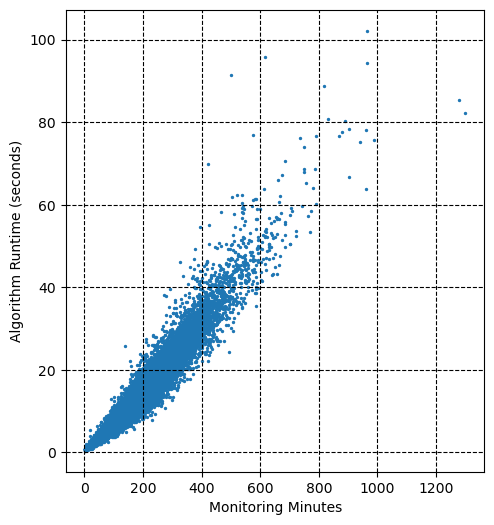

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(5.4, 6))
# ax.set_aspect('equal')
ax.grid(b=True, which='major', color='k', linestyle='--')
plt.scatter(df["best_total"], df["runtime"], s=2)
plt.xlabel("Monitoring Minutes")
plt.ylabel("Algorithm Runtime (seconds)")
plt.show()

## Population (RR)

In [6]:
df = pd.read_csv("/deep/group/physiologic-states/v3/optimizing_coverage_population.optimal.rr.csv")
print(df.shape)
df.head(10)

(25658, 12)


,CSN,orig_len,orig_covered,orig_total,orig_coverage,best_len,best_covered,best_total,best_coverage,RR_covered,RR_total,runtime
0,131293642074,3,27,59,0.457627,3,38,59,0.644068,38,59,2.979927
1,131293638136,2,9,15,0.600000,2,12,15,0.800000,12,15,0.885513
2,131293635703,2,4,5,0.800000,2,5,5,1.000000,5,5,0.526467
3,131293609969,2,9,34,0.264706,2,34,34,1.000000,34,34,1.574484
4,131293609853,2,116,148,0.783784,2,120,148,0.810811,120,148,5.410603
5,131293604041,12,168,331,0.507553,12,263,331,0.794562,263,331,15.593382
6,131293603172,8,68,234,0.290598,8,119,234,0.508547,119,234,9.676531
7,131293602848,4,74,149,0.496644,4,95,149,0.637584,95,149,6.215535
8,131293600245,6,167,216,0.773148,6,196,216,0.907407,196,216,9.589013
9,131293591962,5,14,19,0.736842,5,18,19,0.947368,18,19,1.404949


In [7]:
df["orig_coverage"].describe()

count    25658.000000
mean         0.531430
std          0.226826
min          0.000000
25%          0.369253
50%          0.545724
75%          0.707290
max          1.000000
Name: orig_coverage, dtype: float64

In [8]:
df["best_coverage"].describe()

count    25658.000000
mean         0.818146
std          0.103794
min          0.307087
25%          0.753086
50%          0.829868
75%          0.895599
max          1.000000
Name: best_coverage, dtype: float64

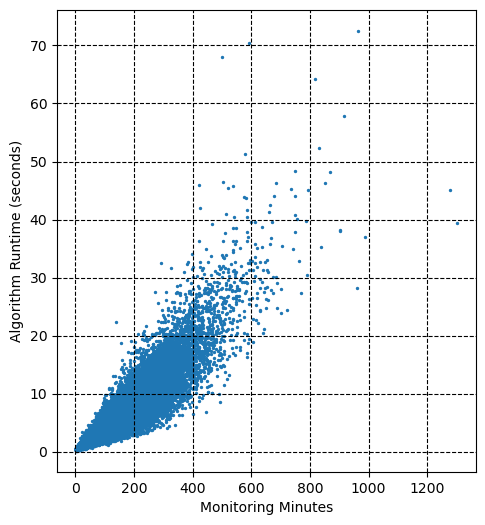

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(5.4, 6))
# ax.set_aspect('equal')
ax.grid(b=True, which='major', color='k', linestyle='--')
plt.scatter(df["best_total"], df["runtime"], s=2)
plt.xlabel("Monitoring Minutes")
plt.ylabel("Algorithm Runtime (seconds)")
plt.show()

## Population (SpO2)

In [10]:
df = pd.read_csv("/deep/group/physiologic-states/v3/optimizing_coverage_population.optimal.spo2.csv")
print(df.shape)
df.head(10)

(25781, 12)


,CSN,orig_len,orig_covered,orig_total,orig_coverage,best_len,best_covered,best_total,best_coverage,SpO2_covered,SpO2_total,runtime
0,131291711760,3,86,119,0.722689,3,91,119,0.764706,91,119,5.102196
1,131316007775,11,263,266,0.988722,11,262,266,0.984962,262,266,15.211418
2,131291709213,5,275,290,0.948276,5,290,290,1.000000,290,290,9.383844
3,131316007474,4,52,142,0.366197,4,121,142,0.852113,121,142,6.456941
4,131291708108,3,67,95,0.705263,3,95,95,1.000000,95,95,2.813728
5,131316005430,5,88,213,0.413146,5,186,213,0.873239,186,213,10.264027
6,131291706340,5,139,139,1.000000,5,139,139,1.000000,139,139,5.581674
7,131316003615,4,188,383,0.490862,4,312,383,0.814621,312,383,16.041150
8,131291703241,7,188,378,0.497354,7,363,378,0.960317,363,378,15.223750
9,131316001378,11,284,426,0.666667,11,393,426,0.922535,393,426,27.895332


In [11]:
df["orig_coverage"].describe()

count    25781.000000
mean         0.780778
std          0.237436
min          0.000000
25%          0.654321
50%          0.866667
75%          0.975610
max          1.000000
Name: orig_coverage, dtype: float64

In [12]:
df["best_coverage"].describe()

count    25781.000000
mean         0.949799
std          0.074868
min          0.319728
25%          0.932584
50%          0.981132
75%          1.000000
max          1.000000
Name: best_coverage, dtype: float64

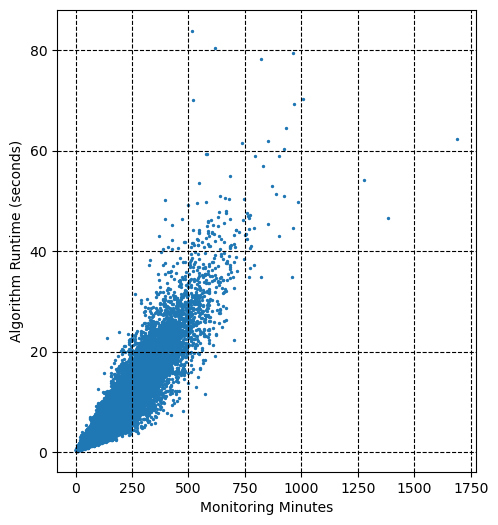

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(5.4, 6))
# ax.set_aspect('equal')
ax.grid(b=True, which='major', color='k', linestyle='--')
plt.scatter(df["best_total"], df["runtime"], s=2)
plt.xlabel("Monitoring Minutes")
plt.ylabel("Algorithm Runtime (seconds)")
plt.show()

## Population (MAP)

In [14]:
df = pd.read_csv("/deep/group/physiologic-states/v3/optimizing_coverage_population.optimal.map.csv")
print(df.shape)
df.head(10)

(24337, 12)


,CSN,orig_len,orig_covered,orig_total,orig_coverage,best_len,best_covered,best_total,best_coverage,MAP_covered,MAP_total,runtime
0,131320775786,3,22,22,1.000000,3,22,22,1.000000,22,22,1.373016
1,131318773010,12,39,111,0.351351,12,86,111,0.774775,86,111,8.020914
2,131320775540,4,105,142,0.739437,4,140,142,0.985915,140,142,6.434054
3,131318772233,4,97,239,0.405858,4,239,239,1.000000,239,239,13.403810
4,131320773511,6,151,172,0.877907,6,165,172,0.959302,165,172,7.826451
5,131318770712,3,30,159,0.188679,3,129,159,0.811321,129,159,8.296547
6,131320771364,3,21,75,0.280000,3,67,75,0.893333,67,75,3.555533
7,131318768936,8,212,215,0.986047,8,212,215,0.986047,212,215,12.600133
8,131320769733,2,127,203,0.625616,2,203,203,1.000000,203,203,8.150763
9,131318768261,11,156,223,0.699552,11,211,223,0.946188,211,223,13.777279


In [15]:
df["orig_coverage"].describe()

count    24337.000000
mean         0.569695
std          0.299945
min          0.000000
25%          0.337423
50%          0.588583
75%          0.827586
max          1.000000
Name: orig_coverage, dtype: float64

In [16]:
df["best_coverage"].describe()

count    24337.000000
mean         0.920156
std          0.097768
min          0.392000
25%          0.867725
50%          0.964286
75%          1.000000
max          1.000000
Name: best_coverage, dtype: float64

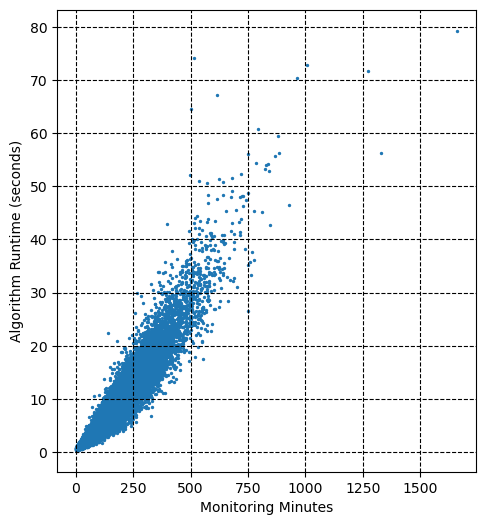

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(5.4, 6))
# ax.set_aspect('equal')
ax.grid(b=True, which='major', color='k', linestyle='--')
plt.scatter(df["best_total"], df["runtime"], s=2)
plt.xlabel("Monitoring Minutes")
plt.ylabel("Algorithm Runtime (seconds)")
plt.show()